In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Clasificarea categoriilor de varste ale persoanelor
<b><i>Categoriile vor fi impartite in modul urmator:</i></b>
<ol>
<li><b>label 0:</b> 04 - 06 ani (early childhood)</li>
<li><b>label 1:</b> 07 - 08 ani (middle childhood)</li>
<li><b>label 2:</b> 09 - 11 ani (late childhood)</li>
<li><b>label 3:</b> 12 - 19 ani (adolescence)</li>
<li><b>label 4:</b> 20 - 27 ani (early adulthood)</li>
<li><b>label 5:</b> 28 - 35 ani (middle adulthood)</li>
<li><b>label 6:</b> 36 - 45 ani (midlife)</li>
<li><b>label 7:</b> 46 - 60 ani (mature adulthood)</li>
<li><b>label 8:</b> 61 - 75 ani (late adulthood)</li>
</ol>

### Salvam matricile imaginilor si etichetele in train_images, train_labes, test_images, test_labels (local).

Loading..................
Au fost gasite in total 11634 imagini.
Au fost incarcate 9304 pentru antrenare.
Au fost incarcate 2330 pentru testare.


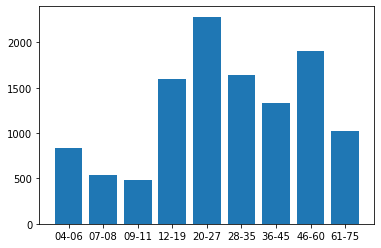

In [ ]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

path_imagini_main = "./imagini_VGG_cu_appa"
lista_foldere = ["04-06", "07-08", "09-11", "12-19", "20-27", "28-35", "36-45", "46-60", "61-75"]
lista_subfoldere = ['f', 'm']

histo = [0] * len(lista_foldere)
lista_imag_label = [[],[],[],[],[],[],[],[],[]]
# va fi o matrice tridimenionala ce contine cele 9 clase, fiecare clasa avand [imaginea, label, real_age]
# lista_imag_label[i][j][0/1/2] unde
# i = clasa [0,1,2,3,4,5,6,7,8 sau 9]
# j = a cata imagine din clasa [0....1500]
# 0 = imaginea matrice, 1 = label pt acea imagine, 2 = varsta reala

print("Loading", end="")
for nume_folder in lista_foldere:
    for nume_subfolder in lista_subfoldere:
        path_imagini = "{}/{}/{}".format(path_imagini_main, nume_folder, nume_subfolder)
        for dirname, subdirnames, filenames in os.walk(path_imagini):
            for filename in filenames:
                if dirname == "{}/04-06/{}".format(path_imagini_main, nume_subfolder):
                    image = cv2.imread("{}/{}".format(dirname, filename))
                    image = cv2.resize(image, (224,224))
                    histo[0] += 1
                    age = filename[:2].replace('_', '')
                    lista_imag_label[0].append([image, 0, age])

                elif dirname == "{}/07-08/{}".format(path_imagini_main, nume_subfolder):
                    image = cv2.imread("{}/{}".format(dirname, filename))
                    image = cv2.resize(image, (224,224))
                    histo[1] += 1
                    age = filename[:2].replace('_', '')
                    lista_imag_label[1].append([image, 1, age])

                elif dirname == "{}/09-11/{}".format(path_imagini_main, nume_subfolder):
                    image = cv2.imread("{}/{}".format(dirname, filename))
                    image = cv2.resize(image, (224,224))
                    histo[2] += 1
                    age = filename[:2].replace('_', '')
                    lista_imag_label[2].append([image, 2, age])

                elif dirname == "{}/12-19/{}".format(path_imagini_main, nume_subfolder):
                    image = cv2.imread("{}/{}".format(dirname, filename))
                    image = cv2.resize(image, (224,224))
                    histo[3] += 1
                    age = filename[:2]
                    lista_imag_label[3].append([image, 3, age])

                elif dirname == "{}/20-27/{}".format(path_imagini_main, nume_subfolder):
                    image = cv2.imread("{}/{}".format(dirname, filename))
                    image = cv2.resize(image, (224,224))
                    histo[4] += 1
                    age = filename[:2]
                    lista_imag_label[4].append([image, 4, age])

                elif dirname == "{}/28-35/{}".format(path_imagini_main, nume_subfolder):
                    image = cv2.imread("{}/{}".format(dirname, filename))
                    image = cv2.resize(image, (224,224))
                    histo[5] += 1
                    age = filename[:2]
                    lista_imag_label[5].append([image, 5, age])

                elif dirname == "{}/36-45/{}".format(path_imagini_main, nume_subfolder):
                    image = cv2.imread("{}/{}".format(dirname, filename))
                    image = cv2.resize(image, (224,224))
                    histo[6] += 1
                    age = filename[:2]
                    lista_imag_label[6].append([image, 6, age])

                elif dirname == "{}/46-60/{}".format(path_imagini_main, nume_subfolder):
                    image = cv2.imread("{}/{}".format(dirname, filename))
                    image = cv2.resize(image, (224,224))
                    histo[7] += 1
                    age = filename[:2]
                    lista_imag_label[7].append([image, 7, age])

                elif dirname == "{}/61-75/{}".format(path_imagini_main, nume_subfolder):
                    image = cv2.imread("{}/{}".format(dirname, filename))
                    image = cv2.resize(image, (224,224))
                    histo[8] += 1
                    age = filename[:2]
                    lista_imag_label[8].append([image, 8, age])
    
            # Print Loading
            print(".", end="")
print()
                
# random.shuffle(lista_imag_label)
# len_total = (len(lista_imag_label))
# len_train = int(0.8 * len_total)
len_train = []
for i in range(len(lista_imag_label)):
    len_train.append(int(0.8 * len(lista_imag_label[i])))

plt.figure()
plt.bar(lista_foldere, histo)

print("Au fost gasite in total {} imagini.".format(len_total))

# train_images = [lista_imag_label[i][0] for i in range(0, len_train)]
# train_labels = [lista_imag_label[i][1] for i in range(0, len_train)]
# test_images = [lista_imag_label[i][0] for i in range(len_total - 1, len_train, -1)]
# test_labels = [lista_imag_label[i][1] for i in range(len_total - 1, len_train, -1)]

train_images = []
train_labels = []
for i in range(len(lista_imag_label)):
    for j in range(0, len_train[i]):
        train_images.append(lista_imag_label[i][j][0])
        train_labels.append(lista_imag_label[i][j][1])
    
test_images = []
test_labels = []
for i in range(len(lista_imag_label)):
    for j in range(len_train[i], len(lista_imag_label[i])):
        test_images.append(lista_imag_label[i][j][0])
        test_labels.append(lista_imag_label[i][j][1])

# optional, pt referinta si acuratete proprie
train_ages = [lista_imag_label[i][j][2] for i in range(0, len(lista_imag_label)) for j in range(len(lista_imag_label[i]))]
test_ages = [lista_imag_label[i][j][2] for i in range(0, len(lista_imag_label)) for j in range(len(lista_imag_label[i]))]

print("Au fost incarcate {} pentru antrenare.".format(len(train_images)))
print("Au fost incarcate {} pentru testare.".format(len(test_images)))

In [ ]:
print(len_train)
print(len(train_images)+len(test_images))
# print(train_ages)

[665, 430, 386, 1280, 1827, 1309, 1061, 1524, 822]
11634


##### Salvam listele de imagini "train_images", "test_images", respectiv listele cu labels "train_labels", "test_labels" ca fisiere NPZ (Save our dataset as NPZ files)
- Vom folosi numpy's savez function pentru aceasta:

In [ ]:
np.savez('AgeClass_train_data_224.npz', np.array(train_images))
np.savez('AgeClass_train_labels_224.npz', np.array(train_labels))
np.savez('AgeClass_test_data_224.npz', np.array(test_images))
np.savez('AgeClass_test_labels_224.npz', np.array(test_labels))

np.savez('AgeClass_train_age_pt_accproprie.npz', np.array(train_ages))
np.savez('AgeClass_test_age_pt_accproprie.npz', np.array(test_ages))

print("Done!")

Done!


---
---
##### Loader Function:

In [ ]:
import numpy as np

def load_data_training_and_test(datasetname):
    
    npzfile = np.load(datasetname + "_train_data_224.npz")
    train = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_train_labels_224.npz")
    train_labels = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_data_224.npz")
    test = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_labels_224.npz")
    test_labels = npzfile['arr_0']

    return (train, train_labels), (test, test_labels)

##### Loader Function (for ages arrays only) -- Asigura-te ca array-urile de train_images, test_images, train_labels etc.. corespund cu train_ages, test_ages !!!

In [ ]:
import numpy as np

def load_age_training_and_test(datasetname):
    
    npzfile = np.load(datasetname + "_train_age_pt_accproprie.npz")
    train_ages = npzfile['arr_0']

    npzfile = np.load(datasetname + "_test_age_pt_accproprie.npz")
    test_ages = npzfile['arr_0']
    
    return (train_ages, test_ages)

#### In Google Colab:
- MOUNT GOOGLE DRIVE
- IMPORT NPZ FILES FROM GOOGLE DRIVE (dureaza 30 secunde)
<b> [ Totodata, acest cod bloc trebuie rulat inainte de a testa modelul: model.predict_classes(...) ] </b> <br>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!sudo rm -r sample_data

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Incarca fisierele .npz din Gdrive in Colab
%cp './drive/My Drive/Colab_Notebooks/Licenta/AgeClass_train_age_pt_accproprie.npz' 'AgeClass_train_age_pt_accproprie.npz'
%cp './drive/My Drive/Colab_Notebooks/Licenta/AgeClass_test_age_pt_accproprie.npz' 'AgeClass_test_age_pt_accproprie.npz'

%cp './drive/My Drive/Colab_Notebooks/Licenta/AgeClass_train_data_224.npz' 'AgeClass_train_data_224.npz'
%cp './drive/My Drive/Colab_Notebooks/Licenta/AgeClass_train_labels_224.npz' 'AgeClass_train_labels_224.npz'
%cp './drive/My Drive/Colab_Notebooks/Licenta/AgeClass_test_data_224.npz' 'AgeClass_test_data_224.npz'
%cp './drive/My Drive/Colab_Notebooks/Licenta/AgeClass_test_labels_224.npz' 'AgeClass_test_labels_224.npz'
print("Fisiere incarcate!")
%ls

Fisiere incarcate!
AgeClass_test_age_pt_accproprie.npz   AgeClass_train_data_224.npz
AgeClass_test_data_224.npz            AgeClass_train_labels_224.npz
AgeClass_test_labels_224.npz          drive/
AgeClass_train_age_pt_accproprie.npz


##### Let's get our data ready in the format expected by Keras

- x_train = training images in format expected by keras
- y_train = labels of training images in format expected by keras
- x_test = test images in format expected by keras
- y_test = labels of test images in format expected by keras

### HOT ONE ENCODING
<b> [ Acest cod bloc trebuie rulat inainte de a testa modelul: model.predict_classes(...) ] </b>

In [ ]:
from keras.utils import to_categorical # One Hot Enconding (pentru clasificare non-binara)
# https://stackoverflow.com/questions/49392972/error-when-checking-target-expected-dense-3-to-have-shape-3-but-got-array-wi
from datetime import datetime
x = datetime.now()

(x_train, y_train), (x_test, y_test) = load_data_training_and_test("AgeClass")

# Reshaping our label data with One Hot Encoding: from (600,) to (600, 8)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
y = datetime.now()
print("Durata totala de incarcare: {}".format(abs(y-x)))

Using TensorFlow backend.


(8725, 224, 224, 3)
(2178, 224, 224, 3)
(8725, 9)
(2178, 9)
Durata totala de incarcare: 0:00:41.554413


---
### CREAREA RETELEI CONVOLUTIONALE (CNN) - Arhitectura modelului

In [ ]:
from keras import applications

mobile = applications.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=False,
    weights=None,
    input_tensor=None,
    pooling=None,
)

In [ ]:
mobile.summary()

In [ ]:
from keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from keras.models import Model

x = mobile.layers[-1].output # -6 in loc de -63 pentru a folosi intreaga retea.
x = GlobalAveragePooling2D(data_format=None)(x)
# x = Dense(27)(x)
x = Dropout(0.5)(x)
predictions = Dense(9, activation='softmax')(x)
model = Model(inputs=mobile.input, output=predictions)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':


In [ ]:
from keras.optimizers import SGD
optim = SGD(learning_rate=0.001, momentum=0.9, nesterov=True) # lr pentru conversia in tf_lite, learning_rate pentru a putea face load la model

model.compile(optimizer=optim,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print("ok!")

ok!


### ANTRENAREA MODELULUI:

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

x = datetime.now()
print(x)

###### Checkpoint - Save the model with the lowest val_loss ! ######
callbacks_list = [
    EarlyStopping(monitor = 'val_loss', patience = 20),
    ModelCheckpoint(filepath='AgeClass_best.h5', verbose=1, monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 10, min_delta=1E-7, verbose=1)
]

epochs = 30
batch_size = 2

try:
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        shuffle=True,
                        callbacks=callbacks_list)
except:
    model.save("AgeClass.h5")
    print("\nInterrupted... But don't worry, the model was still saved !")

# Salvarea modelului: include arhitectura, weights, training configuration (loss, optimizer), the state of optimizer
model.save("AgeClass.h5")

# Evaluate the performance the trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss: {}'.format(scores[0]))
print('Test accuracy: {} \n'.format(scores[1]))

y = datetime.now()
print(y)
print("Durata totala de antrenare: {}".format(abs(y-x)))

2020-06-11 02:39:05.416712
Train on 8725 samples, validate on 2178 samples
Epoch 1/30
8725/8725 [==============================] - 321s 37ms/step - loss: 0.2850 - accuracy: 0.8979 - val_loss: 2.6696 - val_accuracy: 0.4279

Epoch 00001: val_loss improved from inf to 2.66964, saving model to AgeClass_best.h5
Epoch 2/30
8725/8725 [==============================] - 312s 36ms/step - loss: 0.2559 - accuracy: 0.9067 - val_loss: 2.7310 - val_accuracy: 0.4261

Epoch 00002: val_loss did not improve from 2.66964
Epoch 3/30
8725/8725 [==============================] - 312s 36ms/step - loss: 0.2385 - accuracy: 0.9172 - val_loss: 2.9130 - val_accuracy: 0.4229

Epoch 00003: val_loss did not improve from 2.66964
Epoch 4/30
6692/8725 [======================>.......] - ETA: 1:10 - loss: 0.2139 - accuracy: 0.9262
Interrupted... But don't worry, the model was still saved !
2178/2178 [==============================] - 6s 3ms/step
Test loss: 2.9097457016767767
Test accuracy: 0.4274563789367676 

2020-06-11 

Salvare model in Drive

In [ ]:
%cp 'AgeClass_best.h5' './drive/My Drive/Colab_Notebooks/Licenta/AgeClass_best.h5'
print("Saved!")

Saved!


Salvare model în local:

### Afisare grafic LOSS si ACCURACY (imediat dupa antrenare):

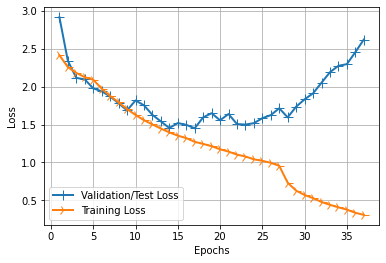

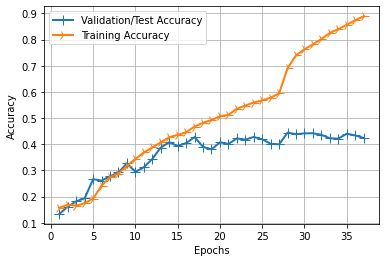

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

history_dict = history.history

### Grafic LOSS:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

### Grafic ACCURACY
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

---
# Determinare acuratete proprie !!!

In [ ]:
import numpy as np
from keras.models import load_model
from datetime import datetime
x = datetime.now()

nr_cazuri_corecte = 0
nr_cazuri_corecte_cu_limite = 0
nr_cazuri_totale = len(x_test)

classifier = load_model("AgeClass.h5")
(train_ages, test_ages) = load_age_training_and_test("AgeClass")

for i in range(0, nr_cazuri_totale):
    input_im = x_test[i]
    input_im = input_im.reshape(1,224,224,3)
    
    real_label = int(np.argmax(y_test[i]))
    real_age = int(test_ages[i])
    
    ### Get Prediction
    res = list(classifier.predict(input_im, 1, verbose = 0)[0])
    predict_label = int(np.argmax(res))

    if predict_label == real_label:
        nr_cazuri_corecte += 1 
        nr_cazuri_corecte_cu_limite += 1

    elif predict_label == 3: # 12-19 ani
        if real_age in [10, 11, 20, 21]:
            nr_cazuri_corecte_cu_limite += 1
            
    elif predict_label == 4: # 20-27 ani
        if real_age in [18, 19, 28, 29]:
            nr_cazuri_corecte_cu_limite += 1
        
    elif predict_label == 5: # 28-35 ani)
        if real_age in [26, 27, 36, 37]:
            nr_cazuri_corecte_cu_limite += 1

    elif predict_label == 6: # 36-45 ani
        if real_age in [34, 35, 46, 47]:
            nr_cazuri_corecte_cu_limite += 1

    elif predict_label == 7: # 46-60 ani
        if real_age in [44, 45, 61, 62]:
            nr_cazuri_corecte_cu_limite += 1
    
    elif predict_label == 8: # 61-75 ani
        if real_age in [58, 59, 60]:
            nr_cazuri_corecte_cu_limite += 1

print()
print("{} corecte din {} in total".format(nr_cazuri_corecte, nr_cazuri_totale))
print(nr_cazuri_corecte / nr_cazuri_totale)
print()
print("{} corecte (cu limite) din {} in total".format(nr_cazuri_corecte_cu_limite, nr_cazuri_totale))
print(nr_cazuri_corecte_cu_limite / nr_cazuri_totale)
print()
print("{} poze clasificate in plus in mod corect (cu limita)".format(nr_cazuri_corecte_cu_limite-nr_cazuri_corecte))
print()

# for i in range(len(test_ages)):
#     print(int(np.argmax(y_test[i])), test_ages[i])

y = datetime.now()
print("Durata totala pentru a determina acuratetea: {}".format(abs(y-x)))


924 corecte din 2178 in total
0.42424242424242425

1425 corecte (cu limite) din 2178 in total
0.6542699724517906

501 poze clasificate in plus in mod corect (cu limita)

Durata totala pentru a determina acuratetea: 0:00:40.889070


---
---
## Confusion Matrix

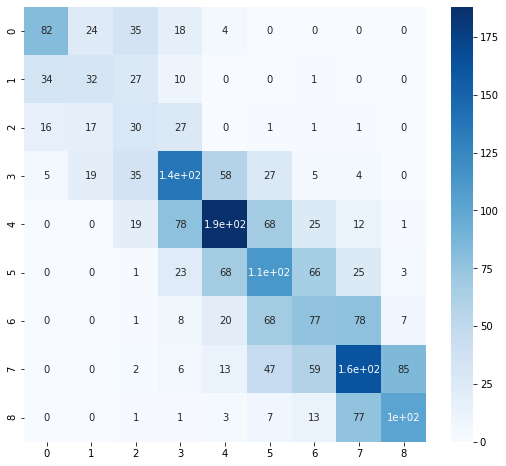

In [ ]:
from sklearn.metrics import confusion_matrix
from keras.models import load_model
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline 

most_recent = "AgeClass.h5"
most_recent2 = "AgeClass_best.h5"
model = load_model(most_recent)

y_pred = np.int32([np.argmax(r) for r in model.predict(x_test)])
plt.figure(figsize=(9,8))
cm = confusion_matrix(y_true = y_test.argmax(axis=1),
                      y_pred = y_pred)

# cm = cm / cm.sum(axis=1) # Show in procents %
sn.heatmap(cm, annot=True, cmap="Blues")


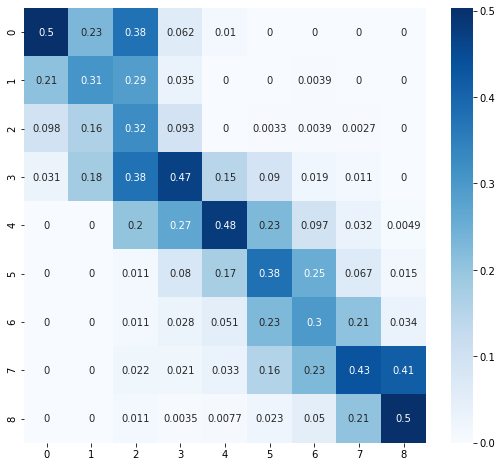

In [ ]:
### Afisare matrice confuzie ca procent:
cm = cm / cm.sum(axis=1) # Show in procents %
plt.figure(figsize=(9,8))
sn.heatmap(cm, annot=True, cmap="Blues")

---
---
---
### (1) TESTAREA CLASIFICATORULUI (vizualizand imaginile x_test)
---
<li><b>label 0:</b> 4 - 6 ani (early childhood)</li>
<li><b>label 1:</b> 7 - 8 ani (middle childhood)</li>
<li><b>label 2:</b> 9 - 11 ani (late childhood)</li>
<li><b>label 3:</b> 12 - 19 ani (adolescence)</li>
<li><b>label 4:</b> 20 - 27 ani (early adulthood)</li>
<li><b>label 5:</b> 28 - 35 ani (middle adulthood)</li>
<li><b>label 6:</b> 36 - 45 ani (midlife)</li>
<li><b>label 7:</b> 46 - 60 ani (mature adulthood)</li>
<li><b>label 8:</b> 61 - 75 ani (late adulthood)</li>

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

simple = "AgeClass-2019-08-24-21-00.h5"
mobile = "AgeClass-2019-08-23-22-00_MobileDropout.h5"
google = "AgeClass-google-2019-08-29-23-00.h5"
most_recent = "AgeClass.h5"
most_recent2 = "AgeClass_best4762.h5"

classifier = load_model(most_recent2)
(train_ages, test_ages) = load_age_training_and_test("AgeClass")

def string_prezicere(pred):
    if pred == 0:
        pred = "04 - 06 ani"
    if pred == 1:
        pred = "07 - 08 ani"
    if pred == 2:
        pred = "09 - 11 ani"
    if pred == 3:
        pred = "12 - 19 ani"
    if pred == 4:
        pred = "20 - 27 ani"
    if pred == 5:
        pred = "28 - 35 ani"
    if pred == 6:
        pred = "36 - 45 ani"
    if pred == 7:
        pred = "46 - 60 ani"
    if pred == 8:
        pred = "61 - 75 ani"
    return pred

def draw_test(name, pred, pred_real, input_age, input_im):
    black_color = [0,0,0]

    pred = string_prezicere(pred)
    pred_real = string_prezicere(pred_real)
    
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT,value=black_color)
    cv2.putText(expanded_image, "prediction: {}".format(pred), (500, 30) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,255,255), 1)
    cv2.putText(expanded_image, "real_class: {}".format(pred_real), (500, 60) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,255,255), 1)
    cv2.putText(expanded_image, "real_age: {}".format(input_age), (500, 90) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,255,255), 1)

    cv2.imshow(name, expanded_image)

for i in range(0,18):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    input_label = y_test[rand]
    input_label = int(np.argmax(input_label))
    
    input_age = test_ages[rand]
        
    imageL = cv2.resize(input_im, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,224,224,3)
    
    ### Get Prediction
    res = list(classifier.predict(input_im, 1, verbose = 0)[0])
    index = int(np.argmax(res))
    #print(res)

    draw_test("Prediction", index, input_label, input_age, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

### (2) TESTAREA CLASIFICATORULUI (pe o singura imagine)

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

simple = "AgeClass-2019-08-24-21-00.h5"
mobile = "AgeClass-2019-08-23-22-00_MobileDropout.h5"
google = "AgeClass-google-2019-08-29-23-00.h5"
most_recent = "AgeClass.h5"
most_recent2 = "AgeClass_best4762.h5"

classifier = load_model(most_recent2)

def draw_test(name, pred, input_im):
    black_color = [0,0,0]
    if pred == 0:
        pred = "04 - 06 ani"
    if pred == 1:
        pred = "07 - 08 ani"
    if pred == 2:
        pred = "09 - 11 ani"
    if pred == 3:
        pred = "12 - 19 ani"
    if pred == 4:
        pred = "20 - 27 ani"
    if pred == 5:
        pred = "28 - 35 ani"
    if pred == 6:
        pred = "36 - 45 ani"
    if pred == 7:
        pred = "46 - 60 ani"
    if pred == 8:
        pred = "61 - 75 ani"
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT,value=black_color)
    cv2.putText(expanded_image, str(pred), (500, 50) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (233,233,233), 2)
    cv2.imshow(name, expanded_image)

input_im = cv2.imread("poza3.jpg")
input_im = cv2.resize(input_im, (224,224))

imageL = cv2.resize(input_im, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

input_im = input_im.reshape(1,224,224,3)

## Get Prediction
res = list(classifier.predict(input_im, verbose = 0)[0])
print(res)
index = int(np.argmax(res))

draw_test("Prediction", index, imageL) 
cv2.waitKey(0)

cv2.destroyAllWindows()

---
## (3) TESTAREA CLASIFICATORULUI (FOLOSIND O POZA CAPTURATA DE WEBCAM)

In [ ]:
from keras.models import load_model

simple = "AgeClass-2019-08-24-21-00.h5"
mobile = "AgeClass-2019-08-23-22-00_MobileDropout.h5"
google = "AgeClass-google-2019-08-29-23-00.h5"
most_recent = "AgeClass.h5"
most_recent2 = "AgeClass_best4762.h5"

# classifier = load_model("AgeClass-google-2019-08-29-16-00_full_mobile.h5")
classifier = load_model(most_recent2)

In [ ]:
import cv2
import numpy as np

def draw_test(name, pred, input_im):
    black_color = [0,0,0]
    if pred == 0:
        pred = "04 - 06 ani"
    if pred == 1:
        pred = "07 - 08 ani"
    if pred == 2:
        pred = "09 - 11 ani"
    if pred == 3:
        pred = "12 - 19 ani"
    if pred == 4:
        pred = "20 - 27 ani"
    if pred == 5:
        pred = "28 - 35 ani"
    if pred == 6:
        pred = "36 - 45 ani"
    if pred == 7:
        pred = "46 - 60 ani"
    if pred == 8:
        pred = "61 - 75 ani"
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT,value=black_color)
    #expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (500, 50) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (233,233,233), 2)
    cv2.imshow(name, expanded_image)

face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
webcam = cv2.VideoCapture(0)
webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
webcam.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

while True:
    _, frame = webcam.read()
    
    gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor = 1.2, minNeighbors=5)
    for x,y,w,h in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,255,255), 3)
    cv2.imshow("Capturing", frame)
    
    key = cv2.waitKey(1)
    if key == ord('s') or key == ord('S'): 
        saved_image = frame
        faces = face_cascade.detectMultiScale(saved_image, scaleFactor = 1.2, minNeighbors=5)
        
        for x,y,w,h in faces:
            cv2.rectangle(saved_image, (x,y), (x+w,y+h), (255,255,255), 3)
            
            input_im = saved_image[y:y+h, x:x+w]
        
        webcam.release()
        cv2.destroyAllWindows()
        break
    
    elif key == ord('q') or key == ord('Q'):
        webcam.release()
        cv2.destroyAllWindows()
        break

input_im = cv2.resize(input_im, (224,224))
cv2.waitKey(0)
cv2.destroyAllWindows()

imageL = cv2.resize(input_im, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

input_im = input_im.reshape(1,224,224,3)

## Get Prediction
res = list(classifier.predict(input_im, verbose = 0)[0])
print(res)
index = int(np.argmax(res))

draw_test("Prediction", index, imageL) 
cv2.waitKey(0)

cv2.destroyAllWindows()

[0.06002923, 0.042517744, 0.2450577, 0.45213085, 0.004637681, 0.0004898451, 0.005061853, 0.080756165, 0.10931896]


In [ ]:
cv2.destroyAllWindows()

---
---
## Convert .h5 model to tensorflow lite!

In [ ]:
%tensorflow_version 2.x

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cp './drive/My Drive/Colab_Notebooks/Licenta/AgeClass_best.h5' 'AgeClass_best.h5'
print("Imported!")

Imported!


In [ ]:
import tensorflow as tf

# converter = tf.contrib.lite.TFLiteConverter.from_keras_model_file("AgeClass_best.h5") # module 'tensorflow' has no attribute 'contrib'
# converter = tf.lite.TFLiteConverter.from_keras_model_file("AgeClass_best.h5") # 'TFLiteConverterV2' has no attribute 'from_keras_model_file'
model = tf.keras.models.load_model('AgeClass_best_06_11-05-25.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model) # doar pentru versiunea tensorflow 2.x
tflite_model = converter.convert()

with open('AgeClass_best_06_11-05-25.tflite', 'wb') as f:
    f.write(tflite_model)

print("Done!")

In [ ]:
%cp 'AgeClass_best.tflite' './drive/My Drive/Colab_Notebooks/Licenta/AgeClass_best.tflite'
print("Saved!")

Saved!


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0
